# Example Notebook for Setting up and Installing basemap (mpl_toolkits) on Bluemix

In [1]:
# On Linux, Python installations default to the unicode representation of the OS environment (ucs2 vs ucs4)
# Let's check the size of the Unicode character a Python interpreter is using by checking the value of sys.maxunicode
import sys
if sys.maxunicode > 65535:
    print 'UCS4 build'
else:
    print 'UCS2 build'

UCS2 build


## Identify your current working directory
### We will need to declare a few paths

In [2]:
# Author:  Sanjay Joshi (@jStartter) ibm.biz/sanjay_joshi
# Courtesy of jStart - IBM Emerging Technology's client engagement team

import os
import subprocess as sub

%matplotlib inline

p = sub.Popen(['pwd'],stdout=sub.PIPE,stderr=sub.PIPE)
prefix, errors = p.communicate()
prefix = os.sep.join(prefix.split(os.sep)[:-2])
shareDir = prefix + "/.local/share"
packageDir = prefix + "/.local"
toolkit_path = packageDir + "/lib/python2.7/site-packages/mpl_toolkits"
basemapDir = shareDir + "/notebook_basemap"
print "prefix = " + prefix
print "shareDir = " + shareDir
print "Python packageDir = " + packageDir
print "basemapDir = " + basemapDir

prefix = /gpfs/global_fs01/sym_shared/YPProdSpark/user/s1a2-472d95bcebf7db-bf066087ecf5
shareDir = /gpfs/global_fs01/sym_shared/YPProdSpark/user/s1a2-472d95bcebf7db-bf066087ecf5/.local/share
Python packageDir = /gpfs/global_fs01/sym_shared/YPProdSpark/user/s1a2-472d95bcebf7db-bf066087ecf5/.local
basemapDir = /gpfs/global_fs01/sym_shared/YPProdSpark/user/s1a2-472d95bcebf7db-bf066087ecf5/.local/share/notebook_basemap


In [3]:
# Let's test to see if we've already built basemap
# Since this is a python package, we'll look for its pre-requisite geos lib
isBasemapInstalled = os.path.isfile(toolkit_path + "/basemap/_proj.so")
if isBasemapInstalled:
    print "Congratulations! Basemap is already installed within your notebook user space"
else:
    print "Basemap is NOT installed within this notebook's user space"

Congratulations! Basemap is already installed within your notebook user space


In [4]:
if not isBasemapInstalled:
    !mkdir $shareDir 2> /dev/null
    !mkdir $basemapDir
    !mkdir $basemapDir/basemap
    print "Basemap directories created to facilitate Basemap build and install"

## Fetch Snapshot of basemap tar gzip file

In [5]:
if not isBasemapInstalled:
    !wget https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz -O $basemapDir/basemap-1.0.7.tar.gz

## Untar (extract) file

In [6]:
if not isBasemapInstalled:
    !tar -zxvf $basemapDir/basemap-1.0.7.tar.gz -C $basemapDir >/dev/null
    basemapSrcDir = basemapDir + "/basemap-1.0.7rel"
    print basemapSrcDir

In [7]:
if not isBasemapInstalled:
    !ls -al $basemapSrcDir

## Let's build and install the pre-requisite GEOS library

In [8]:
# Setting up where libs and headers will go
if not isBasemapInstalled:
    !mkdir $basemapDir/geos
    !$basemapSrcDir/geos-3.3.3/configure --prefix=$basemapDir/geos

In [9]:
if not isBasemapInstalled:
    !make -w -j2 && make -w install

<div class="alert alert-danger" role="alert">
  <strong>WARNING</strong> You may have to reload your browser to continue.  The Make and Make Install process can sometimes cause the notebook to lose it's kernel context.  Don't worry, all of the compiled files will persist across the browser reload.
</div>

In [10]:
if not isBasemapInstalled:
    !ls -al $basemapDir/basemap-1.0.7rel/src

In [11]:
os.environ['GEOS_DIR']= basemapDir + "/geos"
if not isBasemapInstalled:
    !cd $basemapSrcDir && python setup.py install --prefix=$packageDir

In [12]:
# Re-evaluate installation status
# Since this is a python package, we'll look for its pre-requisite geos lib
isBasemapInstalled = os.path.isfile(toolkit_path + "/basemap/_proj.so")

if isBasemapInstalled:
    # Remove all of configure generated by-products
    !rm -rf * 2>/dev/null
    # Remove the extracted source folder
    
    !rm -rf $basemapDir/basemap-1.0.7rel 2>/dev/null
    # Remove the tar gzip file
    !rm $basemapDir/basemap-1.0.7.tar.gz 2>/dev/null
    print "BASEMAP directories for facilitating BASEMAP build and install have been removed"
else:
    print "BASEMAP build and install seems to have failed.  Cannot local <BASEMAP_Install_Point>/geos/include/geos.h"

BASEMAP directories for facilitating BASEMAP build and install have been removed


In [13]:
# http://stackoverflow.com/questions/24790498/error-install-basemap-on-mac#answer-25733972
import mpl_toolkits
if isBasemapInstalled:
    mpl_toolkits.__path__.append(toolkit_path)

[Basemap Tutorial](http://introtopython.org/visualization_earthquakes.html)

## Smoke Test

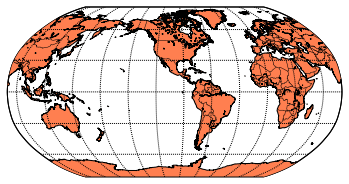

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

## Let's test out a basemap tutorial

In [15]:
if isBasemapInstalled:
    !mkdir datasets
    !wget http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv -O ./datasets/earthquake_data.csv

--2016-05-24 18:55:02--  http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv
Resolving earthquake.usgs.gov (earthquake.usgs.gov)... 184.25.63.35, 184.25.63.50, 2001:559:19:300::6846:7b78, ...
Connecting to earthquake.usgs.gov (earthquake.usgs.gov)|184.25.63.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: './datasets/earthquake_data.csv'

    [ <=>                                   ] 172,236     --.-K/s   in 0.008s  

2016-05-24 18:55:02 (21.7 MB/s) - './datasets/earthquake_data.csv' saved [172236]



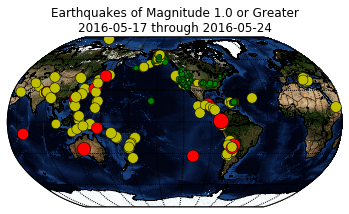

In [16]:
# http://introtopython.org/visualization_earthquakes.html
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
#eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.25
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)
 
plt.show()